In [25]:
import pandas as pd

In [26]:
csv_files=dict()
for year in range(1999,2021):
    for week in range(1,18):
        csv_files[f"{year}-{week:02}"]=(f"./data/{year}/week{week}.csv")

In [27]:
data_frames=dict()
for i in csv_files:
    data_frames[i]=(pd.read_csv(csv_files[i])[["Player","PPRFantasyPoints","Pos"]])

In [28]:
data = dict()
players = dict()
for i in data_frames:
    data[i]=dict()
    for index, row in data_frames[i].iterrows():
        s = row["Player"]
        players[s]=0
        p = row["PPRFantasyPoints"]
        data[i][s]=p

Calculate player value upto.

0.00


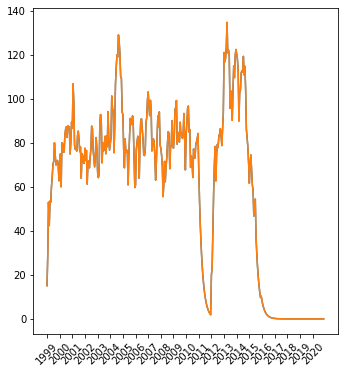

In [67]:
import matplotlib.pylab as plt
import numpy as np
def calculateScoreto(player,upto="2020-17"):
    playerData=dict()
    score =0.0
    for i in data:
        if i==upto:
            break
        score*=.8
        if player in data[i]:
            score += data[i][player]
        if score<0:
            score =0
        playerData[i]=score
    return (score,playerData)
score, playerData = calculateScoreto("Peyton Manning")
print(f"{score:.2f}")
lists = sorted(playerData.items()) # sorted by key, return a list of tuples


fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)


x, y = zip(*lists) # unpack a list of pairs into two tuples
x = list(x)
x = [val.split("-")[0] if val.split("-")[1]=="01" else val for val in x]
plt.plot(x, y)

ax.plot(x,y)

fig.canvas.draw()
ax.set_xticks(np.arange(0, len(x)+1, 17))
#ax.set_xticklabels([x.get_text().split("-")[0] for x in ax.get_xticklabels()] )
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [30]:
for df in data:
    if(df == "2018-17"):
        break
    for player in players:
        players[player]*=.8
        if player in data[df]:
            players[player]+=data[df][player]

53092.60


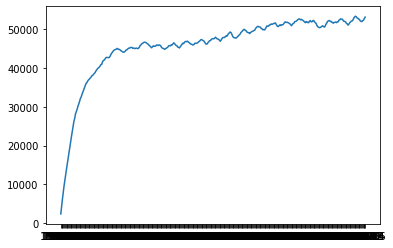

In [31]:

def calc_total_market(upto="2020-17"):
    playerData=dict()
    score =0.0
    for i in data:
        if i==upto:
            break
        score*=.95
        score+=sum(data[i].values())
        if score<0:
            score =0
        playerData[i]=score
    return (score,playerData)
score, playerData = calc_total_market()
print(f"{score:.2f}")
lists = sorted(playerData.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()